# Analysis of Industries that Contribute to Virginia's GDP

In [1]:
# Install and load the required libraries
install.packages("MASS")
install.packages("car")
install.packages("lmtest")
install.packages("mltools")
install.packages("forecast")

# Downloading packages -------------------------------------------------------
- Downloading MASS from CRAN ...                OK [1.1 Mb in 0.22s]
Successfully downloaded 1 package in 1 second.

The following package(s) will be installed:
- MASS [7.3-61]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing MASS ...                           OK [installed binary and cached in 0.67s]
# Downloading packages -------------------------------------------------------
- Downloading car from CRAN ...                 OK [1.5 Mb in 0.18s]
Successfully downloaded 1 package in 0.78 seconds.

The following package(s) will be installed:
- car [3.1-3]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing car ...              

# Data Import and Cleaning, Processing

In [2]:
# Load the libraries
library(MASS)
library(car)
library(lmtest)

Loading required package: carData

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Exploratory Data Analysis

In [3]:
data <- read.csv("ML_gdp_data.csv", stringsAsFactors = TRUE)
head(data)

,Year,Quarter,GeoFips,GeoName,Region,TableName,SectorID,Sector,Unit,GDP,Population,GDPPerCap
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,2018,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,3549.7,8.511,417.0720
2,2019,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,3664.8,8.557,428.2809
3,2020,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,4314.5,8.591,502.2116
4,2021,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,3707.0,8.642,428.9516
5,2022,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,4794.1,8.679,552.3793
6,2023,Q1,51000,Virginia,5,SQGDP2,76,"Arts, entertainment, and recreation",Millions of current dollars,6162.7,8.716,707.0560


# Exploratory Data Analysis (EDA)
Description:
This stage is crucial for understanding the dataset's structure and identifying patterns or anomalies:



## Visualizations

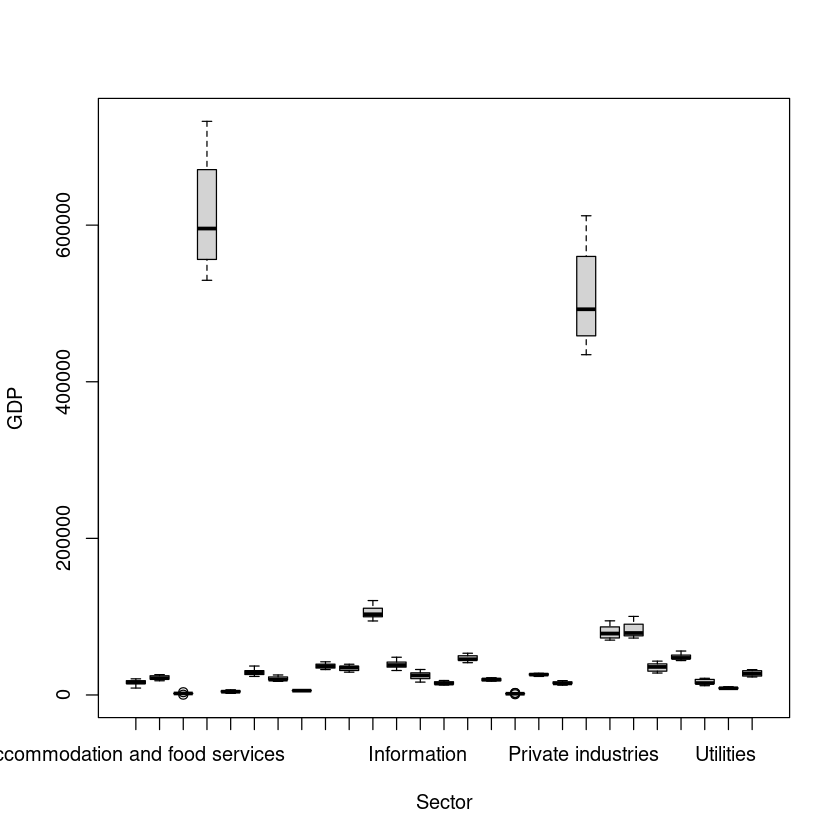

In [4]:
# Useless graph
options(scipen = 999)
plot(GDP ~ Sector, data = data)

# Feature Engineering and model selection

Running our linear model using GDP and Sector to determine sector significance, and sector contribution to GDP. This is also the primary model we ended up using.

Further down, we also compared the models that contained the interaction effects, and the model without interaction effects. We found that the interaction effects complicated the interpretability of the model. We tried to make our model as straight forward as possible.

###  Transformation & Rationale

In [5]:
model1 <- lm(GDP ~ Sector, data = data)
summary(model1)


Call:
lm(formula = GDP ~ Sector, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-83481  -2181   -269   1920 119522 

Coefficients:
                                                                                Estimate
(Intercept)                                                                      16309.5
SectorAdministrative and support and waste management and remediation services    5843.9
SectorAgriculture, forestry, fishing and hunting                                -14305.6
SectorAll industry total                                                        596724.3
SectorArts, entertainment, and recreation                                       -11876.2
SectorConstruction                                                               12547.4
SectorDurable goods manufacturing                                                 4554.2
SectorEducational services                                                      -10640.8
SectorFederal civilian                               

# Making quarter a category using factor()

In [6]:
data$Quarter <- factor(data$Quarter, levels = c('Q1', 'Q2', 'Q3', 'Q4'))

data$Year <- factor(data$Year, levels = c('2018', '2019', '2020', '2021', '2022', '2023'))
str(data)

'data.frame':	675 obs. of  12 variables:
 $ Year      : Factor w/ 6 levels "2018","2019",..: 1 2 3 4 5 6 NA 1 1 1 ...
 $ Quarter   : Factor w/ 4 levels "Q1","Q2","Q3",..: 1 1 1 1 1 1 1 4 2 1 ...
 $ GeoFips   : int  51000 51000 51000 51000 51000 51000 51000 51000 51000 51000 ...
 $ GeoName   : Factor w/ 1 level "Virginia": 1 1 1 1 1 1 1 1 1 1 ...
 $ Region    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ TableName : Factor w/ 1 level "SQGDP2": 1 1 1 1 1 1 1 1 1 1 ...
 $ SectorID  : int  76 76 76 76 76 76 36 70 3 3 ...
 $ Sector    : Factor w/ 27 levels "Accommodation and food services ",..: 5 5 5 5 5 5 25 12 3 3 ...
 $ Unit      : Factor w/ 1 level "Millions of current dollars": 1 1 1 1 1 1 1 1 1 1 ...
 $ GDP       : num  3550 3665 4314 3707 4794 ...
 $ Population: num  8.51 8.56 8.59 8.64 8.68 ...
 $ GDPPerCap : num  417 428 502 429 552 ...


# Plotted GDP and Quarter (now a category) with a box plot. We didn't actually use this in the presentation.

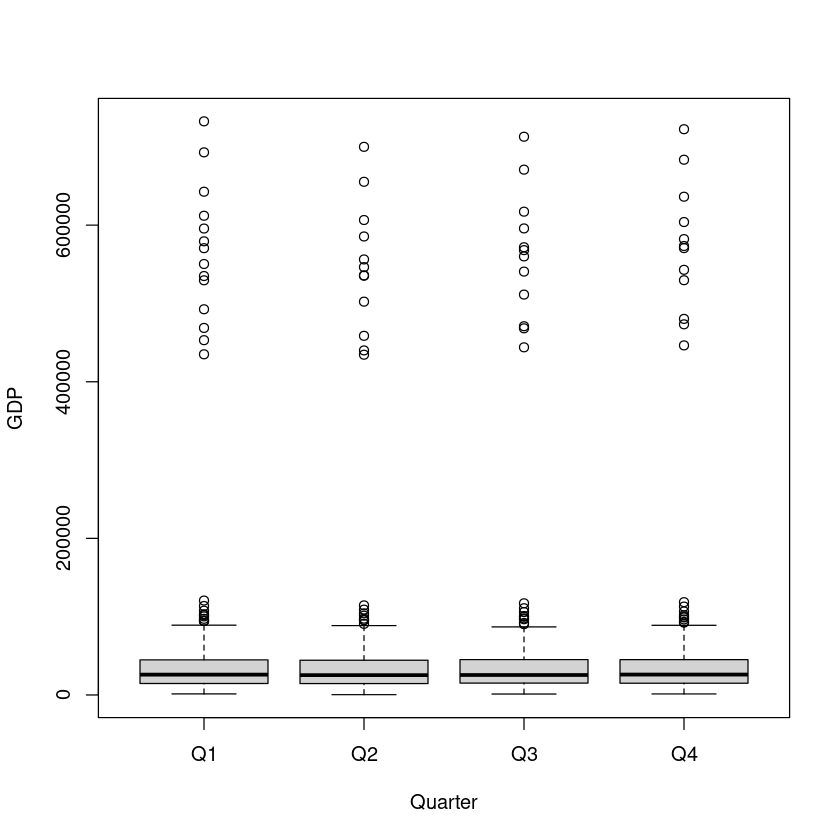

In [7]:
plot(GDP ~ Quarter, data = data)

# Now we plotted year and GDP (year being a category now). We did use something similar to this in our presentation. 

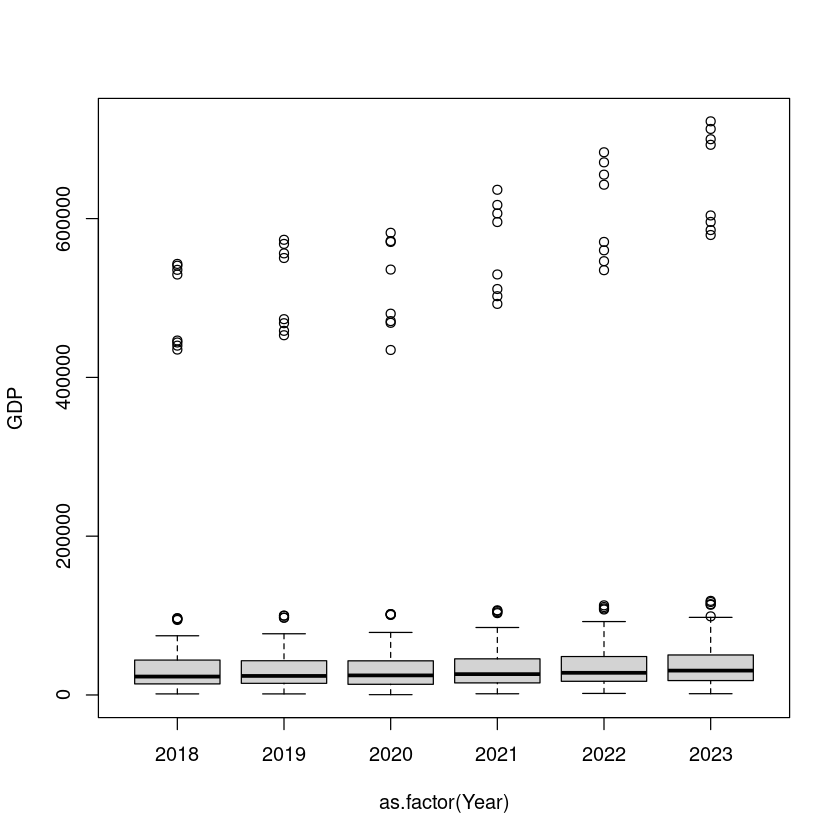

In [8]:
plot(GDP ~ as.factor(Year) , data = data)

# We then tried running a linear model using the interaction effect of sector and year. We did not use this in our project.

In [14]:
model2 <- lm(GDP ~  Sector *Year, data = data)
summary(model2)


Call:
lm(formula = GDP ~ Sector * Year, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-29260.9   -417.3     -1.9    500.1  22376.6 

Coefficients:
                                                                                           Estimate
(Intercept)                                                                               14468.600
SectorAdministrative and support and waste management and remediation services             5149.200
SectorAgriculture, forestry, fishing and hunting                                         -12760.075
SectorAll industry total                                                                 522689.700
SectorArts, entertainment, and recreation                                                -10754.850
SectorConstruction                                                                         9642.650
SectorDurable goods manufacturing                                                          4117.250
SectorEducational services 

# This is a histogram of our GDP. Thinking about it now, we probably could have transformed GDP to normalize it. 

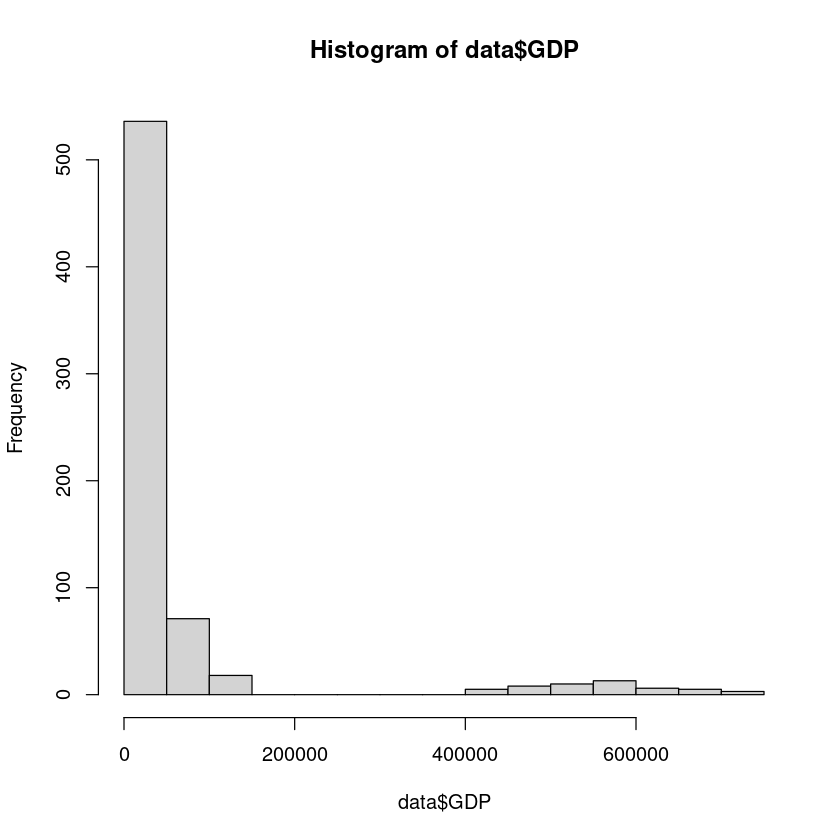

In [10]:
hist(data$GDP)

# Summary of Our Findings


To summarise, we found that the standard linear model using GDP and Sector, without the interation effect between sector and year provided the most understandable output. The model output for the linear model with Sector and GDP had the same p-value as the model with the interaction effect between sector and year. Therfore we just used the linear model without the interaction effect. Some interesting findings were related to the beta coeficcients. 

Sectors like Government and Real Estate had high positive Beta coefficients, indicating a positively proportional relationsip for one unit increase in Government and Real Estate GDP. Sectors like Education and Mining had a negative beta coefficient indicating an inversely/negatively proportional relationship.

Furthermore these trends can also be seen in major players/companies in these sectors. For example, Q2 of 2020 onwards, quarter and sector together (sector * quarter) have become important indicators (significant) for the combination of Real Estate and Leasing affected by quarter. These trends go hand in hand with the business and valuation of Housing finance companies like Fredie Mac.